In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get data from secret file
file = open('database.txt')

lines = file.readlines()
url = lines[0].rstrip()
driver = lines[1].rstrip()
user = lines[2].rstrip()
password = lines[3].rstrip()

In [3]:
spark = SparkSession.builder.appName('CreditCardSystem').getOrCreate()

In [11]:
#Placeholder name is loan, although it doesnt want to query the name I changed to
df = spark.read.format('jdbc').options(
      url=url,
      driver=driver,
      dbtable='loan',
      user=user,
      password=password).load()

In [12]:
df = df.toPandas()

In [13]:
df.head(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [14]:
d = df[(df['Married'] == 'Yes') & (df['Application_Status'] == 'Y')]

In [15]:
d = d.groupby(['Gender', 'Income'])['Application_ID'].count().reset_index(name='Count')

In [16]:
d

,Gender,Income,Count
0,Female,high,3
1,Female,low,10
2,Female,medium,4
3,Male,high,17
4,Male,low,119
5,Male,medium,83


[Text(0, 0, '17'), Text(0, 0, '119'), Text(0, 0, '83')]

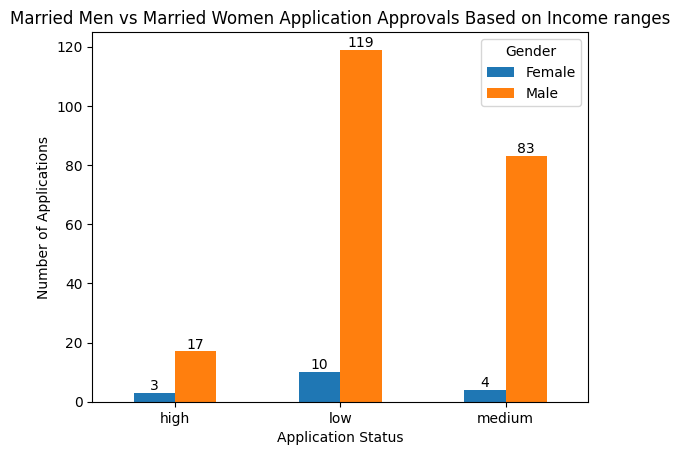

In [17]:
ax = d.pivot(index='Income', columns='Gender', values='Count').plot(kind='bar', rot='horizontal')

ax.set_title('Married Men vs Married Women Application Approvals Based on Income ranges')
ax.set_xlabel('Application Status')
ax.set_ylabel('Number of Applications')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [87]:
f = df.groupby(['Property_Area', 'Application_Status'])['Application_ID'].count().reset_index(name='Count')

In [88]:
f

,Property_Area,Application_Status,Count
0,Rural,N,59
1,Rural,Y,90
2,Semiurban,N,44
3,Semiurban,Y,153
4,Urban,N,61
5,Urban,Y,104


[Text(0, 0, '90'), Text(0, 0, '153'), Text(0, 0, '104')]

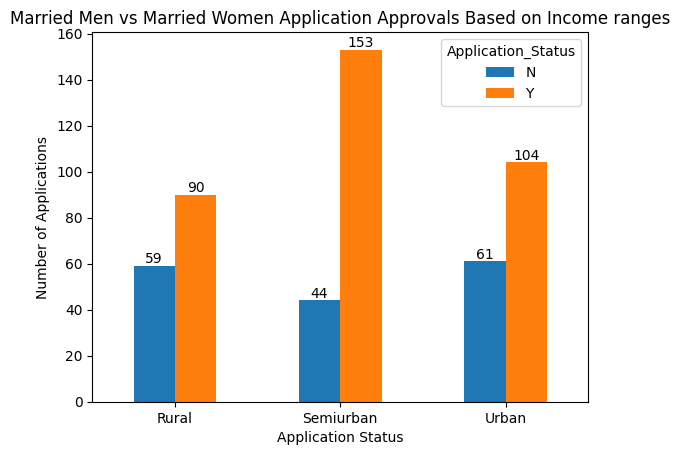

In [92]:
ax1 = f.pivot(index='Property_Area', columns='Application_Status', values='Count').plot(kind='bar', rot='horizontal')

ax1.set_title('Married Men vs Married Women Application Approvals Based on Income ranges')
ax1.set_xlabel('Application Status')
ax1.set_ylabel('Number of Applications')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])